# RoboMaster AI Challenge 1.0.0
Armour localisation/identification with YOLO (You Only Look Once: one-shot object detection algorithm)
> Framework: darknet https://github.com/AlexeyAB/darknet

> Architecture:
* YOLOv3, YOLOv4 - original model focus on superior performance
* YOLOv3-tiny, YOLOv4-tiny - lightweight model suitable for mobile application 

##COMP90082 - Software Project - RM-koala

Team member (alphabetical order):

* Akhtar Kurniawan (Akhtar)
* Che-Hao Chang (Ryan)
* Isaac Pedroza (Isaac)
* Jia Yin (Jia)
* Sejin Kim (Kim)


## 1. Setup

####Mount your Google Drive

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


####Verify GPU and CUDA driver

In [2]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
import psutil
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
gpu = GPUs[0]
process = psutil.Process(os.getpid())

print("GPU RAM {}MB".format(gpu.memoryTotal))

!/usr/local/cuda/bin/nvcc --version

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=adb1bf09ec74ff55fbea6862b21ebae19f471111959617381440e8f6a4a6ac99
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
GPU RAM 15079.0MB
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


####Clone darknet repo & Configure the runtime settings & Make the executable

In [3]:
%cd content/gdrive/My\ Drive
!git clone https://github.com/AlexeyAB/darknet
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!make

/content/gdrive/My Drive
fatal: destination path 'darknet' already exists and is not an empty directory.
/content/gdrive/My Drive/darknet
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warn

###File type overview
>* .weight/.conv: Initial weight or trained weight file
* .cfg: Configuration file, defines the network architecture
* .data: Points to the data directory
* .names: Defines the class labels

####Retrieve necessary files

In [ ]:
# weight files
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.conv.29
!wget https://pjreddie.com/media/files/darknet53.conv.74
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/trained_weight/rm_old/yolov3-tiny_final.weights

In [ ]:
# data set and loader files
%cd data
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/file_list/mask_test.txt
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/file_list/mask_valid.txt
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/file_list/mask_train.txt
!mkdir images
%cd images
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/images/mask.zip
!unzip mask.zip

!mkdir rm_old
%cd rm_old
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/images/image_red_1_1to123.zip
!unzip image_red_1_1to123.zip

%cd ../../..

In [ ]:
# configuration files
%cd cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/mask.data
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/rm.data
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/mask.names
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/rm.names
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/rm_1class.names
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/rm_2class.names
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/rm_4class.names
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov3_mask.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov4-tiny_mask.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov4_mask.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov4-tiny_1class.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov4-tiny_2class.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov4-tiny_4class.cfg
!wget https://github.com/cchia790411/rm_ai_challenge_2020s2_koala/raw/dev/resource/cfg/yolov3-tiny-rm.cfg
%cd ..

####Define image display helper

In [4]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

## 2. Test YOLOv4 on pre-trained weights and configurations

###darknet framework command overview
>Command format
* !./darknet detector test [path to .data file] [path to config] [path to weights] [path to image]

>Command line flags
* -ext_output: output bounding box location
* -thresh: Set confidence threshold for prediction
* -out: Output result as json file
* -map: Show mean average percision over training when there is a validation data set 
* -dont_show: Don't show prediction result in place


####Object detection with pre-trained weight on COCO dataset

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

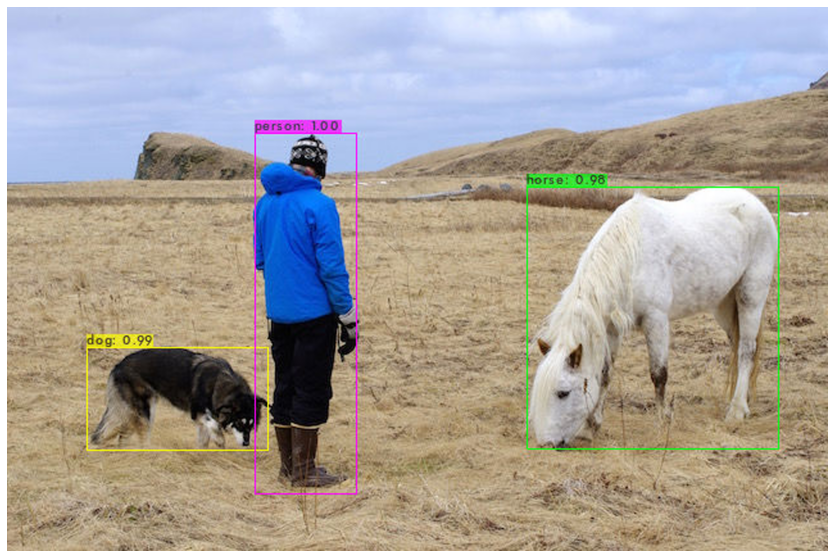

In [5]:
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg -ext_output -thresh 0.3 -dont_show
imShow('predictions.jpg')

####Armour detection with pre-trained weight from previous team

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     16       3 x 3/ 1    576 x 288 x   3 ->  576 x 288 x  16 0.143 BF
   1 max                2x 2/ 2    576 x 288 x  16 ->  288 x 144 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    288 x 144 x  16 ->  288 x 144 x  32 0.382 BF
   3 max                2x 2/ 2    288 x 144 x  32 ->  144 x  72 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    144 x  72 x  32 ->  144 x  72 x  64 0.382 BF
   5 max                2x 2/ 2    144 x  72 x  64 ->   72 x  36 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     72 x  36 x  64 ->   72 x  36 x 128 0.382 BF
   7 max                2x 2/ 2     72 x  36 x 128 ->   36 x  18 x 128 0.000 BF
   8 conv    256       3 x 3/ 1     36 

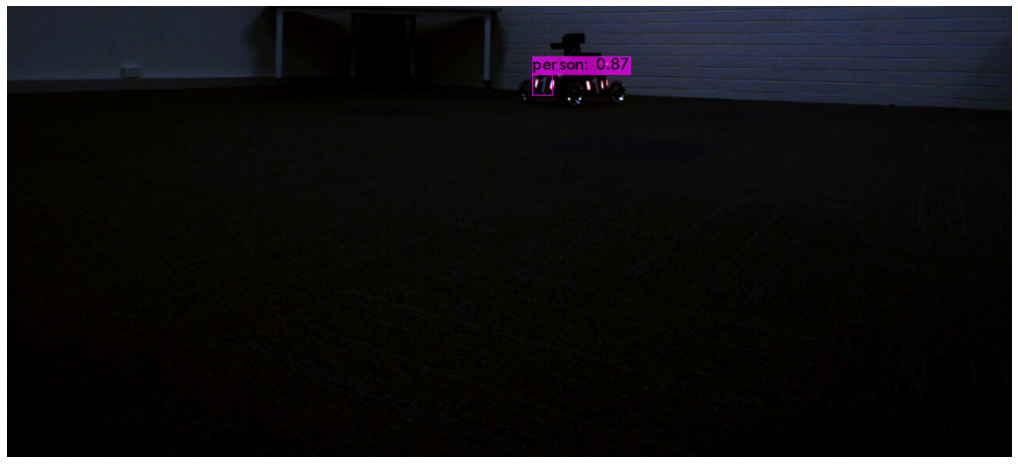

In [32]:
!./darknet detect cfg/yolov3-tiny-rm.cfg yolov3-tiny_final.weights data/images/rm_old/frame0058.jpg -ext_output -thresh 0.7 -dont_show
imShow('predictions.jpg')

## 3. Custom dataset training

####Change access permission to the folder

In [7]:
!chmod +x ./darknet

####Training & Test YOLOv3 (darknet53 backbone)

In [12]:
!./darknet detector train cfg/mask.data cfg/yolov3_mask.cfg darknet53.conv.74 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov3_mask
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 3, batch = 24, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

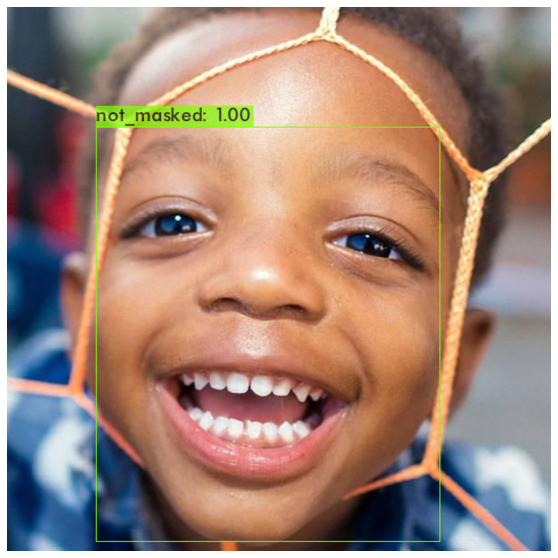

In [13]:
!./darknet detector test cfg/mask.data cfg/yolov3_mask.cfg backup/yolov3_mask_final.weights data/images/mask/test/new_103.jpg -dont_show
imShow('predictions.jpg')

####Training & Test YOLOv4

In [11]:
!./darknet detector train cfg/mask.data cfg/yolov4_mask.cfg yolov4.conv.137 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4_mask
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x 

In [ ]:
!./darknet detector test cfg/mask.data cfg/yolov4_mask.cfg backup/yolov4_mask_final.weights data/images/mask/test/new_103.jpg -dont_show
imShow('predictions.jpg')

####Training & Test YOLOv4-tiny

In [14]:
!./darknet detector train cfg/mask.data cfg/yolov4-tiny_mask.cfg yolov4-tiny.conv.29 -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-tiny_mask
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9

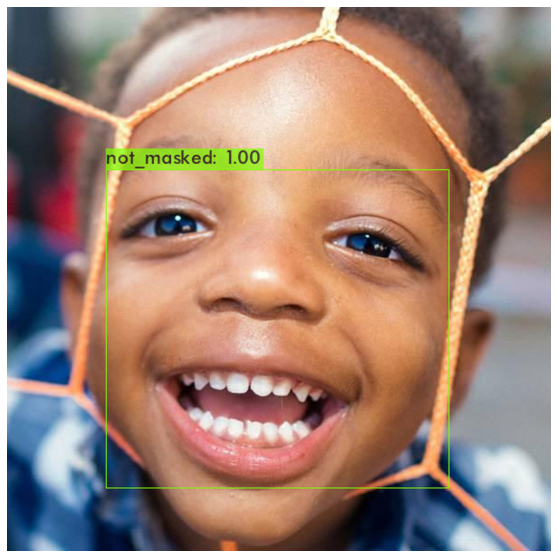

In [15]:
!./darknet detector test cfg/mask.data cfg/yolov4-tiny_mask.cfg backup/yolov4-tiny_mask_final.weights data/images/mask/test/new_103.jpg -dont_show
imShow('predictions.jpg')

## 4. Self-labelled robot dataset multi-phase training

####Start training

In [ ]:
!./darknet detector train cfg/rm.data cfg/yolov4-tiny_4class.cfg yolov4-tiny.conv.29 -dont_show

####Pick up training from last time

In [ ]:
!./darknet detector train cfg/rm.data cfg/yolov4-tiny_4class.cfg backup/yolov4-tiny_4class_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9

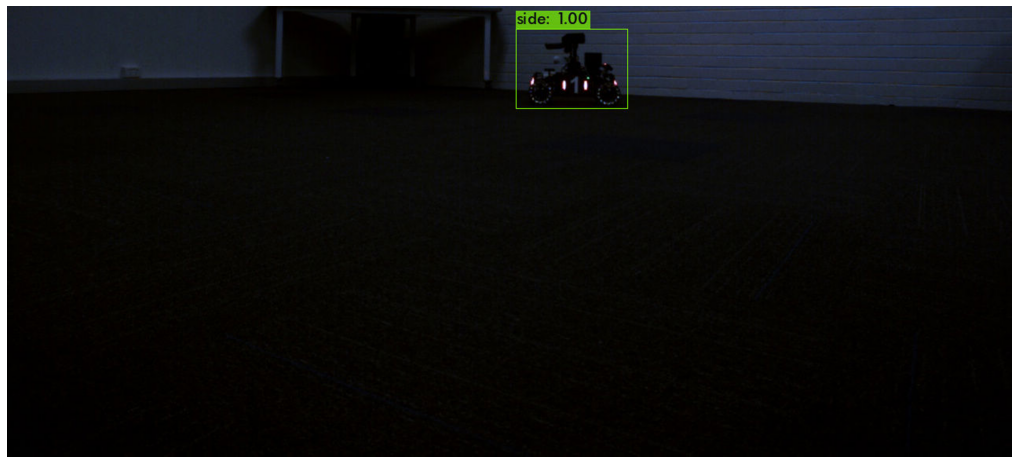

In [35]:
!./darknet detector test cfg/rm.data cfg/yolov4-tiny_4class.cfg backup/yolov4-tiny_4class_last.weights data/images/rm_old/frame0070.jpg -ext_output -thresh 0.3 -dont_show
imShow('predictions.jpg')